**You can use Google but don't use ChatGPT and Gemini. You are here to learn. Follow the instructions given below and write the code in that cell only.**


**Dataset Link:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [3]:
# Load the dataset using pandas
!pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt 
path = 'WineQT.csv'




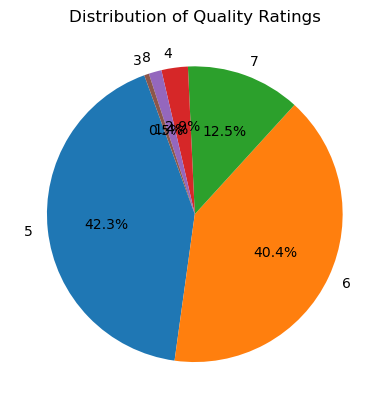

The quality rating with the highest percent is 5


In [14]:
# Plot the pie chart showing how much each quality exist in this dataset
# Your pie chart should have 6 parts with each part representing 1 quality number
# Print out the quality which has the highest percent

df = pd.read_csv(path)
count_qual = df['quality'].value_counts()
plt.figure()
plt.pie(count_qual, labels=count_qual.index, autopct='%1.1f%%', startangle=110)
plt.title('Distribution of Quality Ratings')
plt.show()
highest_quality = count_qual.idxmax()
print(f"The quality rating with the highest percent is {highest_quality}")






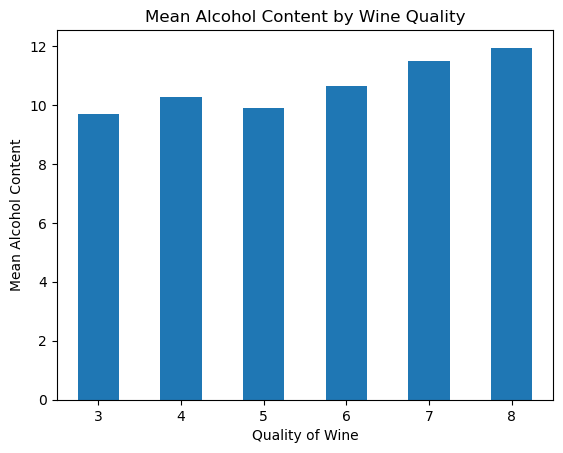

In [21]:
# Plot a bar graph
# X axis: Quality of wine
# Y axis: Mean of total alcohol in that quality of wine
# Suppose quality 5 has 9.4, 9.8, 9.2 as entries in alcohol column then the value will be (9.4 + 9.8 + 9.2)/3
# Hint: use groupby() and mean() methods

alcohol_mean= df.groupby('quality')['alcohol'].mean()
plt.figure()
alcohol_mean.plot(kind='bar')
plt.xlabel('Quality of Wine')
plt.ylabel('Mean Alcohol Content')
plt.title('Mean Alcohol Content by Wine Quality')
plt.show()






In [22]:
# Partition df into X and Y
# Y has only one column which is quality (target)
# X has all the other columns (features)

Y = df['quality']
X = df.drop(columns=['quality'])
print("First few rows of Y (target):")
print(Y.head())
print("\nFirst few rows of X (features):")
print(X.head())




First few rows of Y (target):
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

First few rows of X (features):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0             

In [35]:
# Split into train and test datasets using test_size = 0.2 and random_state = 97

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=97)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")
 


X_train shape: (914, 12)
X_test shape: (229, 12)
Y_train shape: (914,)
Y_test shape: (229,)


In [41]:
# Define a function which implements the Min-Max Scaler
# Your function should take a column of X_train as input and returns a list/np array/pd series which is scaled version of that column

import numpy as np
def min_max_scaler(column):
    min_val = column.min()
    max_val = column.max() 
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

Y = df['quality']
X = df.drop(columns=['quality'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=97)
scaled_column = min_max_scaler(X_train['alcohol'])
print("Original 'alcohol' column:")
print(X_train['alcohol'].head())
print("\nScaled 'alcohol' column:")
print(scaled_column.head())


Original 'alcohol' column:
525     9.5
637    10.8
820    11.8
102    10.3
197    12.6
Name: alcohol, dtype: float64

Scaled 'alcohol' column:
525    0.169231
637    0.369231
820    0.523077
102    0.292308
197    0.646154
Name: alcohol, dtype: float64


In [42]:
# Print out the min, max, mean value of the scaled column = 'volatile acidity'
# Print out the min, max, mean value of the scaled column = 'free sulfur dioxide'
# Which has higher min, max and mean value?

scaled_VA = min_max_scaler(X_train['volatile acidity'])
scaled_FSD = min_max_scaler(X_train['free sulfur dioxide'])

va_min = scaled_VA.min()
va_max = scaled_VA.max()
va_mean = scaled_VA.mean()
print("Scaled 'volatile acidity' - Min:", va_min)
print("Scaled 'volatile acidity' - Max:", va_max)
print("Scaled 'volatile acidity' - Mean:", va_mean)

fsd_min = scaled_FSD.min()
fsd_max = scaled_FSD.max()
fsd_mean = scaled_FSD.mean()
print("Scaled 'free sulfur dioxide' - Min:", fsd_min)
print("Scaled 'free sulfur dioxide' - Max:", fsd_max)
print("Scaled 'free sulfur dioxide' - Mean:", fsd_mean)

if va_min > fsd_min:
    higher_min = 'volatile acidity'
else:
    higher_min = 'free sulfur dioxide'
if va_max > fsd_max:
    higher_max = 'volatile acidity'
else:
    higher_max = 'free sulfur dioxide'
if va_mean > fsd_mean:
    higher_mean = 'volatile acidity'
else:
    higher_mean = 'free sulfur dioxide'

print(f"Higher Min Value: {higher_min}")
print(f"Higher Max Value: {higher_max}")
print(f"Higher Mean Value: {higher_mean}")


Scaled 'volatile acidity' - Min: 0.0
Scaled 'volatile acidity' - Max: 1.0
Scaled 'volatile acidity' - Mean: 0.2819722130631576
Scaled 'free sulfur dioxide' - Min: 0.0
Scaled 'free sulfur dioxide' - Max: 1.0
Scaled 'free sulfur dioxide' - Mean: 0.21704660504915252
Higher Min Value: free sulfur dioxide
Higher Max Value: free sulfur dioxide
Higher Mean Value: volatile acidity


In [51]:
# Perform normalization using sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# I am assumming I have to perform normalisation of above 2 columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
va_min = X_train_scaled['volatile acidity'].min()
va_max = X_train_scaled['volatile acidity'].max()
va_mean = X_train_scaled['volatile acidity'].mean()
print("Scaled 'volatile acidity' - Min:", va_min)
print("Scaled 'volatile acidity' - Max:", va_max)
print("Scaled 'volatile acidity' - Mean:", va_mean)

fsd_min = X_train_scaled['free sulfur dioxide'].min()
fsd_max = X_train_scaled['free sulfur dioxide'].max()
fsd_mean = X_train_scaled['free sulfur dioxide'].mean()
print("Scaled 'free sulfur dioxide' - Min:", fsd_min)
print("Scaled 'free sulfur dioxide' - Max:", fsd_max)
print("Scaled 'free sulfur dioxide' - Mean:", fsd_mean)

Scaled 'volatile acidity' - Min: 0.0
Scaled 'volatile acidity' - Max: 0.9999999999999999
Scaled 'volatile acidity' - Mean: 0.28197221306315756
Scaled 'free sulfur dioxide' - Min: 0.0
Scaled 'free sulfur dioxide' - Max: 1.0
Scaled 'free sulfur dioxide' - Mean: 0.21704660504915252


**Dataset Link:** https://drive.google.com/file/d/1M_djcbJS8LRZl2Vp5ulESjhzZHMJrNRE/view?usp=sharing

Use this dataset for the below questions, the first column is the target column whereas all the other columns are features.

In [54]:
# Print out the correlation matrix of df

path = 'CLS_DATASET.csv'
df = pd.read_csv(path)
corr_matrix = df.corr()
print(corr_matrix)
target = df.iloc[:, 0]
features = df.iloc[:, 1:]


              1     14.23      1.71      2.43      15.6       127       2.8  \
1      1.000000 -0.321238  0.436127 -0.048260  0.513963 -0.198944 -0.717933   
14.23 -0.321238  1.000000  0.099963  0.210964 -0.303350  0.258742  0.284543   
1.71   0.436127  0.099963  1.000000  0.164955  0.286148 -0.049049 -0.333512   
2.43  -0.048260  0.210964  0.164955  1.000000  0.446698  0.287107  0.128176   
15.6   0.513963 -0.303350  0.286148  0.446698  1.000000 -0.071707 -0.317583   
127   -0.198944  0.258742 -0.049049  0.287107 -0.071707  1.000000  0.208200   
2.8   -0.717933  0.284543 -0.333512  0.128176 -0.317583  0.208200  1.000000   
3.06  -0.846485  0.230133 -0.409324  0.114084 -0.346922  0.187101  0.864046   
0.28   0.487215 -0.151445  0.291501  0.187354  0.359395 -0.252091 -0.448301   
2.29  -0.494887  0.127561 -0.217975  0.008082 -0.190779  0.226504  0.610533   
5.64   0.268562  0.547883  0.250053  0.258643  0.020478  0.199337 -0.056401   
1.04  -0.617690 -0.075375 -0.560854 -0.075181 -0.272

In [32]:
# Nothing to code in this cell, just read and understand

# Thumb Rule: If the magnitude of correlation between two features is high (close to 1) then both features are highly related to each other
# This means that one feature can be expressed in the form of other.
# In simple words feature_2 = some_function(feature_1)
# So it is advisable to drop one of the features and consider only one of them for training the machine learning model


# Thumb Rule: If the magnitude of correlation between one feature and target is high (close to 1) then that features is highly related to the target
# We should consider this feature for training the model


# Thumb Rule: If two features are highly correlated with each other and each feature has a high correlation with the target as well
# Then we consider only 1 feature even though both have higher correlation with the target
# We generally consider the feature which has a higher correlation with the target

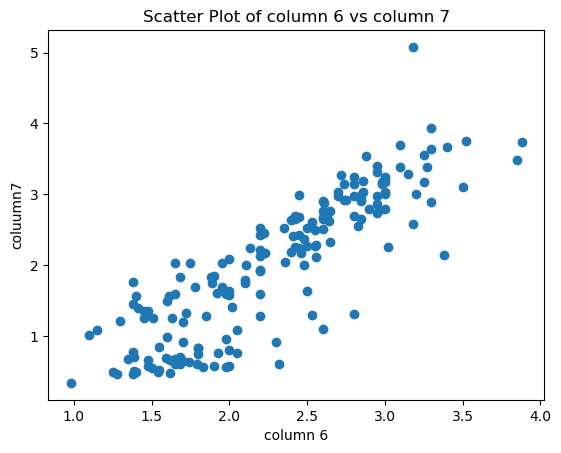

In [80]:
# Can you name two columns which show the relation mentioned in rule 1
# The column names are just numbers
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.

# column 2.8 and 3.06 
column_6 = df.iloc[:, 6]
column_7 = df.iloc[:, 7]
plt.figure()
plt.scatter(column_6, column_7)
plt.xlabel('column 6')
plt.ylabel('coluumn7')
plt.title('Scatter Plot of column 6 vs column 7')
plt.show()
# points are almost in a straight line with a very few deviating a bit much.
# They are very much concentrated between 2.5 and 3 as well as 1.5 and 2


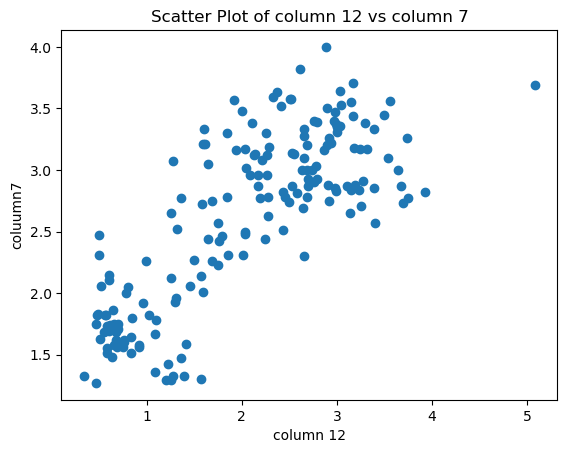

In [81]:
# Can you name two columns which show the relation mentioned in rule 2
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.

#columns 3.06 and 3.92
column_12 = df.iloc[:, 12]
plt.figure()
plt.scatter(column_7, column_12)
plt.xlabel('column 12')
plt.ylabel('coluumn7')
plt.title('Scatter Plot of column 12 vs column 7')
plt.show()
# because the correlational coefficient of column12 and column7 is less than that of column 7and column6 it is much more spread out
# its concentrated around 1 and 3


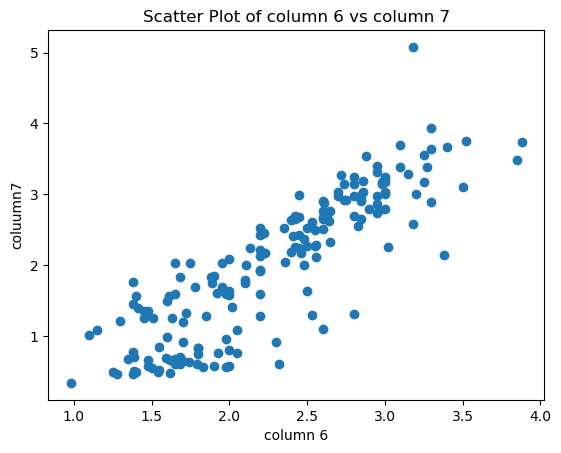

In [82]:
# Can you name two columns which show the relation mentioned in rule 3
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.

# column 2.8 and 3.06 
column_6 = df.iloc[:, 6]
column_7 = df.iloc[:, 7]
plt.figure()
plt.scatter(column_6, column_7)
plt.xlabel('column 6')
plt.ylabel('coluumn7')
plt.title('Scatter Plot of column 6 vs column 7')
plt.show()
# points are almost in a straight line with a very few deviating a bit much.
# They are very much concentrated between 2.5 and 3 as well as 1.5 and 2
# here we take 3.06 over 2.8 as it has high correlation value with target 






**Assignment END<br>
Please submit on teams before the deadline**